### Przygotowanie środowiska programistycznego

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from termcolor import colored

### Wczytanie danych

Poniższa komórka wczytuje i wstępnie przetwarza dane.

In [294]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQZFuVJB21qqms2KeE1kIAKdE6xtHLlyq00khl24IOdFWncOVoyurppSxcrbSRebFhn-QdAlGzzUjMJ/pub?gid=1842745960&single=true&output=csv"

df = pd.read_csv(url, sep=",",parse_dates=[0])
df = df.rename(columns={' ' : "Data"})
df = df.fillna(0)
df.describe()

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,...,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Średnia temp.,Min. temp.,Maks. temp.,Odczuwalna temp.,Opady (mm),Wiatr
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,...,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,225.358025,552.700960,1560.050297,475.310471,245.607682,801.543210,1328.685871,1582.722451,2016.113397,1179.466392,...,561.839049,1152.555098,834.720165,906.176955,9.897348,5.984454,13.790581,8.460448,1.782396,10.927298
std,436.592723,573.898407,1287.927869,801.522689,474.846343,824.064314,1250.413194,1156.375820,1380.121524,1031.872796,...,407.247080,1314.490292,626.779461,672.754362,8.221521,7.175345,9.491318,9.694117,4.829048,5.493548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,...,0.000000,0.000000,1.000000,14.000000,-16.000000,-18.000000,-15.000000,-22.000000,0.000000,0.000000
25%,0.000000,0.000000,439.500000,0.000000,0.000000,0.000000,0.000000,601.500000,829.000000,305.500000,...,236.000000,181.000000,314.000000,321.000000,3.500000,1.000000,6.000000,0.000000,0.000000,7.000000
50%,0.000000,354.000000,1186.000000,0.000000,0.000000,531.000000,1060.000000,1304.000000,1724.000000,894.000000,...,525.000000,599.000000,684.000000,771.000000,10.000000,6.000000,14.000000,9.000000,0.000000,10.000000
75%,216.500000,945.000000,2526.500000,803.500000,233.000000,1339.500000,2181.000000,2392.000000,3005.000000,1944.500000,...,871.500000,1871.000000,1214.000000,1353.000000,16.500000,12.000000,22.000000,17.000000,1.100000,14.000000
max,2042.000000,2335.000000,7075.000000,3182.000000,2084.000000,3418.000000,4572.000000,6142.000000,5436.000000,4025.000000,...,1584.000000,8824.000000,3549.000000,2892.000000,28.500000,21.000000,39.000000,30.000000,63.000000,41.000000


# Zadanie 1

### Analiza wizualna danych

**Proszę:**

* wypisać na ekran nazwy kolumn znajdujące się w zbiorze danych
* narysować na odzielnych rysunkach wykresy liczby rowerzystów w funkcji daty dla ulic **Wielickiej** i **Kopernika**
* narysować dwuwymiarowy wykres liczby rowerzystów na ulicach **Wielickiej (oś X)** i **Kopernika (oś Y)**
* znaleźć dzień kiedy ulicą **Kopernika** przechało najwięcej rowerzystów. Proszę wypisać na ekran  znalezioną datę oraz liczbę rowerzytstów.

Index(['Data', 'Armii Krajowej', 'Bora-Komorowskiego', 'Bulwary', 'Dworzec',
       'Grzegórzecka', 'Kamieńskiego', 'Klimeckiego', 'Kopernika', 'Kotlarska',
       'Mogilska', 'Monte Cassino', 'Niepołomska', 'Nowohucka', 'Smoleńsk',
       'Tyniecka', 'Wadowicka', 'Wielicka', 'Średnia temp.', 'Min. temp.',
       'Maks. temp.', 'Odczuwalna temp.', 'Opady (mm)', 'Wiatr'],
      dtype='object')


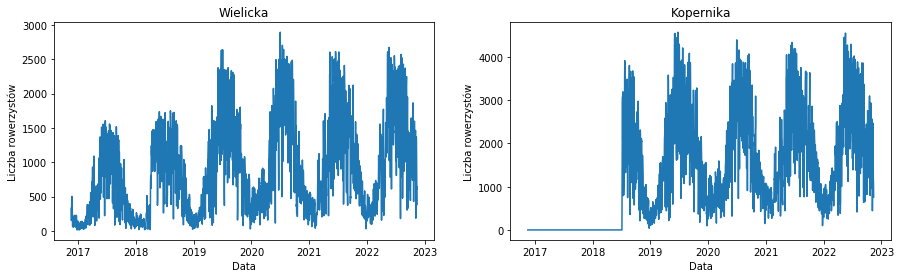

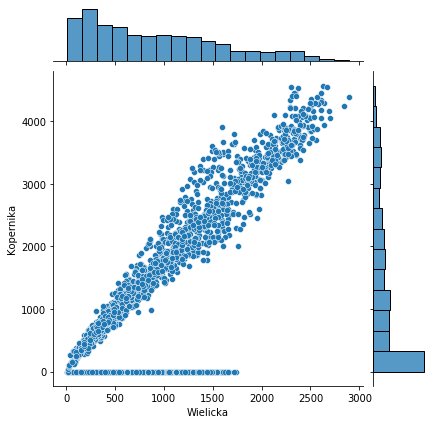

Dnia: 2019-06-25T00:00:00.000000000 ulicą Kopernika przejechało  4572.0  rowerzystów.


In [295]:
print(df.columns)

fig, axes = plt.subplots(1,2, figsize=(15,4))

axes[0].set_title('Wielicka')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Liczba rowerzystów')
axes[0].plot(df['Data'],df['Wielicka'],label='Wielicka')

axes[1].set_title('Kopernika')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Liczba rowerzystów')
axes[1].plot(df['Data'],df['Kopernika'],label='Kopernika')
plt.show()

sns.jointplot(data=df, x='Wielicka', y='Kopernika')
plt.show()

df_max = df[df['Kopernika']==np.max(df['Kopernika'])]
date = np.array(df_max['Data'])[0].astype('str')
value = np.array(df_max['Kopernika'])[0]

#print(colored("Dnia:","blue"),date, colored("ulicą Kopernika przejechało","blue"),value,colored("rowerzystów.","blue"))
print("Dnia: "+date+ " ulicą Kopernika przejechało ",value," rowerzystów.")

# Zadanie 2

Modelowanie liczby rowerzystów z użyciem regresji liniowej.

**Wejście:** liczba rowerzystów na "innych ulicach"

**Wyjście:** liczba rowerzystów na wybranej ulicy

**Proszę:**

* wydzielić zbiór treningowy ```df_train```: zliczenia dla okresu od **2019.01.01** do **2019.12.31**
* wydzielić zbiór testowy, ```df_test```: zliczenia dla okresu od **2020.01.01** do **2022.10.31**

In [296]:
df_train = df[(df['Data']>='2019-01-01') & (df['Data']<='2019-12-31')]
df_test = df[(df['Data']>='2020-01-01') & (df['Data']<='2022-10-31')]

print(df_train)
print(df_test)

           Data  Armii Krajowej  Bora-Komorowskiego  Bulwary Dworzec  \
774  2019-01-01             0.0                32.0      101      49   
775  2019-01-02             0.0               103.0      202     264   
776  2019-01-03             0.0               106.0      277     286   
777  2019-01-04             0.0               119.0      229     273   
778  2019-01-05             0.0                22.0       36      59   
...         ...             ...                 ...      ...     ...   
1134 2019-12-27             0.0               130.0      196     233   
1135 2019-12-28             0.0                71.0      147     147   
1136 2019-12-29             0.0                66.0      165     143   
1137 2019-12-30             0.0               192.0      415     374   
1138 2019-12-31             0.0               161.0      272     288   

      Grzegórzecka  Kamieńskiego  Klimeckiego  Kopernika  Kotlarska  ...  \
774            0.0           0.0         43.0      107.0   

**Proszę:**

* znaleźć parametry regresji liniowej z użyciem algorytmu zbiorczego, dla modelu który przewiduje liczbę rowerzystów na ulicy **Wielickiej** na podstawie zliczeń na ulicach:

```Python
    ['Bora-Komorowskiego',
     'Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk',
     'Tyniecka', 'Wadowicka'] 
```

* zliczenia rowerzystów wchodzące do modelu proszę znormalizować do jedynki: ```x/x.max()```
* wypisać na ekran średnią i odchylenie standardowe względnej różnicy rzeczywistej i obliczonej liczby rowerzystów: ```(y-y_pred)/y``` dla zbiorów testowego
  i treningowego

In [297]:
%%time

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta[None]
    theta_est = np.copy(theta)
    #theta_est = theta_est#np.reshape(theta_est, (-1,2))
    batchSize = len(x)
    y_batch = np.array(y).reshape(-1,1)
    x_batch = np.column_stack((np.ones(batchSize),x))
    print(x_batch.shape)
    print("Th",theta.T.shape)
    for iteration in range(nIter):  
        temp = alpha*(np.matmul(x_batch, theta.T)-y_batch)
        theta = theta - np.mean(temp*x_batch,axis=0)
        #theta = np.mean(theta - alpha*np.sum((np.dot(x_batch, theta.T)-y_batch))*x_batch,axis=0)
        theta_est = np.append(theta_est, theta, axis=0)
    print(temp.shape)
    return theta_est   

        

x = df_train[['Bora-Komorowskiego','Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk','Tyniecka', 'Wadowicka']]
x = x/x.max()  

y = np.array(df_train['Wielicka'])

init_theta = np.zeros(11)

theta_est = iterative_batch_gradient(x, y, init_theta=init_theta, alpha=0.00001, nIter=500)    
print('Optymalne parametry: ',theta_est[-1])

x = np.column_stack((np.ones(x.shape[0]), x) )
y_pred = theta_est.dot(x.T)[10]

a = (y-y_pred)/y

print('***')
print('Dla zbioru treningowego:')
print('Średnia: ',a.mean())
print('Odchylenie standardowe: ',a.std())

### test

x = df_test[['Bora-Komorowskiego','Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk','Tyniecka', 'Wadowicka']]
x = x/x.max() 
x = np.column_stack((np.ones(x.shape[0]), x) )

y = np.array(df_test['Wielicka'])

y_pred = theta_est.dot(x.T)[10]
#y_pred = np.matmul(x, theta_est.T)
a = (y-y_pred)/y

print('***')
print('Dla zbioru testowego:')
print('Średnia: ',a.mean())
print('Odchylenie standardowe: ',a.std())
#print((y-y_pred)/y)
##
pass

(365, 11)
Th (11, 1)
(365, 1)
Optymalne parametry:  [4.93940592 2.09685192 2.61679883 2.83215234 2.830196   2.91288574
 2.80164559 2.59111701 2.99247955 1.41950597 2.08552241]
***
Dla zbioru treningowego:
Średnia:  0.9995589984999677
Odchylenie standardowe:  0.0003943520674117655
***
Dla zbioru testowego:
Średnia:  0.9996503947554816
Odchylenie standardowe:  0.00022491814979331572
CPU times: user 67.5 ms, sys: 25.4 ms, total: 92.9 ms
Wall time: 50 ms


# Zadanie 3

Modelowane klasyfikacji zimno/ciepło na podstawie zliczeń rowerzystów. 

**Proszę:**

* do danych testowych dodać do danych kolumnę "Zimno" zawierającą informację czy było zimno: **Odczuwalna temp.<10 stopni**
* użyć modelu regresji logistycznej do modelowania wartości kolumny "Zimno". Jako dane wejściowe proszę podać listę ulic z zadania 2 z normalizacją liczby rowerzystów do jedynki: **x/x.max()**
* jako parametrów modelu proszę użyć następujących wartości:
```Python
[3.48358238, -2.01857476, -1.52305565, -0.29609745, -0.45887462, -0.39171707, -1.77006993, -2.43057184,  0.06524249, -3.50162108,  0.06548802]
```
* stworzyć macierz ```y_pred``` zawierającą odpowiedź modelu na pytanie "Czy było zimno?"
* używając macierzy ```y_pred``` oraz prawdziwych wartości kolumny "Zimno"
odpowiedzieć na pytania: 
    * **Jaki jest ułamek poprawnych odpowiedzi modelu?**
    * **Jaki ułamek zimnych dni został poprawnie oznaczony jako zimny?** 
    

**Wskazówka**: Proszę zignorować ewentualny komunikat typu 
```
/tmp/ipykernel_235/2082985459.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
```

In [286]:
df_train = df[(df['Data']>='2019-01-01') & (df['Data']<='2019-12-31')]
df_test = df[(df['Data']>='2020-01-01') & (df['Data']<='2022-10-31')]

df_train['Zimno'] = (df_train['Odczuwalna temp.']<10).astype('int')
df_test['Zimno'] = (df_test['Odczuwalna temp.']<10).astype('int')

x = df_train[['Bora-Komorowskiego','Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk','Tyniecka', 'Wadowicka']]
x = x/x.max()  

y = np.array(df_train['Zimno'])

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [287]:
def logistic_func(theta, x):
    # dodaj kolumne jedynek
    x = np.column_stack((np.ones(x.shape[0]),x))
    # policz argument funkcji
    arg = np.sum(theta*x,axis=1)
    # uzyj np.where żeby ograniczyc wartosci parametru do [-18,18]
    arg = np.where(np.abs(arg)<18, arg, 18*np.sign(arg))
    return 1.0/(1+np.exp(-arg))

def log_likelihood(theta, x, y, model):
    result = y*np.log(model(theta,x)) + (1-y)*np.log(1-model(theta,x))
    result = np.sum(result)
    return result

def negative_log_likelihood(theta, x, y, model):
    return -log_likelihood(theta, x, y, model)
    
    
def log_likelihood_derivative(theta, x, y, model):
    # odpowiedź modelu na dane
    x1 = np.column_stack((np.ones(len(x)),x))
    mod = model(theta,x)
    # różnica odpowiedzi modelu i wartości prawdziwej
    dif = np.array(y-mod)
    # obliczenie pochodnej wysumowanej po wszyskich przykładach
    dif = np.reshape(dif,(-1,1))
    #print(dif)
    result = np.sum(dif*x1,axis=0)
    #sprawdzenie poprawności rozmiaru wyniku
    assert result.shape == theta.shape
    return result

def negative_log_likelihood_derivative(theta, x, y, model):
    return -log_likelihood_derivative(theta, x, y, model)

In [288]:
import scipy

model = logistic_func

theta0 = np.array([3.48358238, -2.01857476, -1.52305565, -0.29609745, 
                   -0.45887462, -0.39171707, -1.77006993, -2.43057184, 
                   0.06524249, -3.50162108,  0.06548802])


theta_opt = scipy.optimize.fmin_bfgs(f=negative_log_likelihood, fprime=negative_log_likelihood_derivative,x0=theta0,
                                     args=(x,y, model), disp= True)

print('Optymalne parametry: ', theta_opt)

Optimization terminated successfully.
         Current function value: 79.374603
         Iterations: 72
         Function evaluations: 74
         Gradient evaluations: 74
Optymalne parametry:  [  3.70217126 -37.23550547  -2.4659818  -12.449313    19.71534776
  15.97730344  -3.85321766 -12.30499537   2.6200784    2.59957152
   3.53413549]


In [289]:
### test

def classification(theta, x, model):
    model_result = model(theta,x)
    return (model_result>0.5).astype(int)

x = df_test[['Bora-Komorowskiego','Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk','Tyniecka', 'Wadowicka']]
x = x/x.max() 

y = np.array(df_test['Zimno'])

y_pred = classification(theta_opt,x,logistic_func)


In [290]:
result = pd.DataFrame({'y':y,'y_pred':y_pred, 'Zimno':df_test['Zimno']})
tp = len(result[(result['y']==1) & (result['y_pred']==1)])
tn = len(result[(result['y']==0) & (result['y_pred']==0)])

accuracy = (tp+tn)/(len(result))
tpr = tp/(len(result[result['Zimno']==1]))

In [291]:
print(colored("Model udzielił poprawnej odpowiedzi w","blue"),"{:0.2f}%".format(accuracy*100),colored("przykładów.","blue"))
print(colored("Model udzielił poprawnie oznaczył","blue"),"{:0.2f}%".format(tpr*100),colored("zimnych dni jako zimne.","blue"))

Model udzielił poprawnej odpowiedzi w 82.61% przykładów.
Model udzielił poprawnie oznaczył 70.34% zimnych dni jako zimne.
